In [2]:
#test do we need API key
import requests
url = "https://data.cityofnewyork.us/resource/43nn-pn8j.json?$limit=150000"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    print(f"successfully get the data，total {len(data)} rows")
else:
    print(f"faile to the the data，statement code: {response.status_code}, maybe you need API Key")
#wait a little bit, the data is a little bit large

successfully get the data，total 150000 rows


In [3]:
import pandas as pd

url = "https://data.cityofnewyork.us/resource/43nn-pn8j.json?$limit=150000"
df = pd.read_json(url)

# display the first 5 
print(df.head())

      camis                       dba      boro building           street  \
0  50148587             CONEY'S CONES  Brooklyn     1023   BOARDWALK WEST   
1  50162584             COZY TEA LOFT         0      141   STATE ROUTE 27   
2  50144229  STC CARIBBEAN RESTAURANT  Brooklyn      116  KINGSTON AVENUE   
3  50160127          TERIYAKI & SUSHI  Brooklyn     9605    CHURCH AVENUE   
4  50134256                 PIZZA HUT  Brooklyn     1413    FULTON STREET   

  zipcode       phone          inspection_date   critical_flag  \
0   11224  7183735862  1900-01-01T00:00:00.000  Not Applicable   
1   08820  3472619435  1900-01-01T00:00:00.000  Not Applicable   
2   11213  5168197766  1900-01-01T00:00:00.000  Not Applicable   
3   11212  7186038933  1900-01-01T00:00:00.000  Not Applicable   
4   11216  4692840850  1900-01-01T00:00:00.000  Not Applicable   

               record_date  ...           bbl   nta  cuisine_description  \
0  2025-02-05T06:00:17.000  ...  3.086960e+09  BK21             

In [4]:
type(df)
print('the shape of our data is ',df.shape)
#generate it as csv form in your cp
df.to_csv("nyc_data.csv", index=False, encoding="utf-8")

the shape of our data is  (150000, 26)


In [12]:
#count the NAN's number
nan_counts = df.isna().sum()
nan_counts

camis                        0
dba                          0
boro                         0
building                   193
street                       0
zipcode                   1590
phone                        1
inspection_date              0
critical_flag                0
record_date                  0
latitude                   196
longitude                  196
community_board           1941
council_district          1927
census_tract              1927
bin                       2679
bbl                        351
nta                       1941
cuisine_description       2451
action                    2451
violation_code            3432
violation_description     3432
score                     8394
inspection_type           2451
grade                    77787
grade_date               81898
dtype: int64

In [14]:
#test the data type
df_types = df.dtypes.reset_index()
df_types.columns = ["Column", "Data_Type"]
print(df_types)


                   Column Data_Type
0                   camis     int64
1                     dba    object
2                    boro    object
3                building    object
4                  street    object
5                 zipcode    object
6                   phone    object
7         inspection_date    object
8           critical_flag    object
9             record_date    object
10               latitude   float64
11              longitude   float64
12        community_board   float64
13       council_district   float64
14           census_tract   float64
15                    bin   float64
16                    bbl   float64
17                    nta    object
18    cuisine_description    object
19                 action    object
20         violation_code    object
21  violation_description    object
22                  score   float64
23        inspection_type    object
24                  grade    object
25             grade_date    object


In [ ]:
#from the output the the col's type ig float could use mean,mode or median to replace the NAN value 

In [13]:
df.info

<bound method DataFrame.info of            camis                       dba       boro building  \
0       50148587             CONEY'S CONES   Brooklyn     1023   
1       50162584             COZY TEA LOFT          0      141   
2       50144229  STC CARIBBEAN RESTAURANT   Brooklyn      116   
3       50160127          TERIYAKI & SUSHI   Brooklyn     9605   
4       50134256                 PIZZA HUT   Brooklyn     1413   
...          ...                       ...        ...      ...   
149995  50038914             HARLEM NIGHTS  Manhattan     2361   
149996  41698687       FLORINDA RESTAURANT      Bronx      656   
149997  41605870          CAKOR RESTAURANT      Bronx      632   
149998  50058240                ALOAF CAFE  Manhattan      170   
149999  50108268            WEN XUAN HOUSE   Brooklyn      287   

                  street zipcode       phone          inspection_date  \
0         BOARDWALK WEST   11224  7183735862  1900-01-01T00:00:00.000   
1         STATE ROUTE 27   08

可绘制 Boxplot 的列: Index(['camis', 'latitude', 'longitude', 'community_board', 'council_district',
       'census_tract', 'bin', 'bbl', 'score'],
      dtype='object')


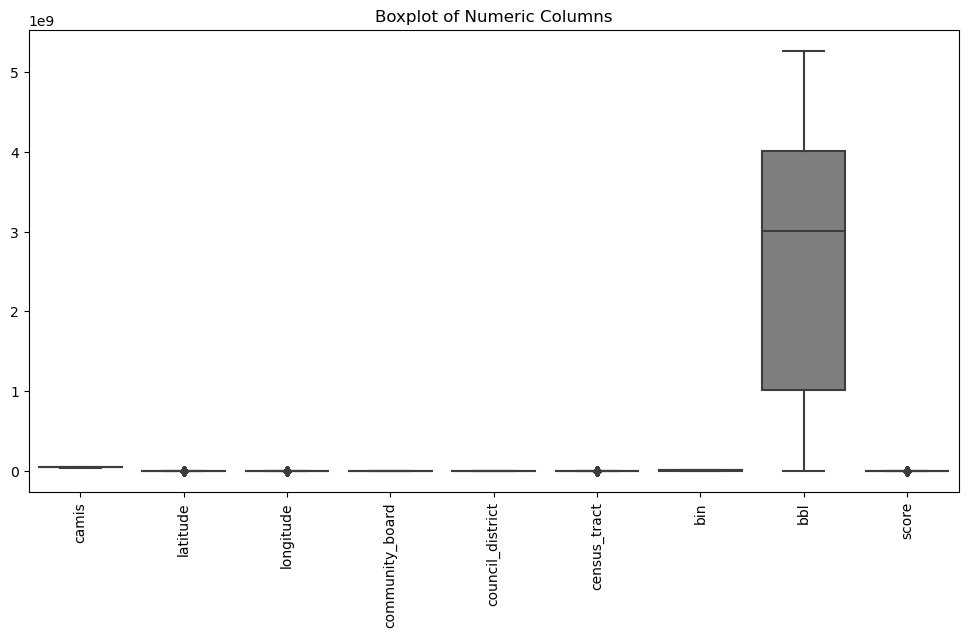

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# select（int64 and float64）col
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
print("可绘制 Boxplot 的列:", numeric_cols)

# draw Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Boxplot of Numeric Columns")
plt.show()


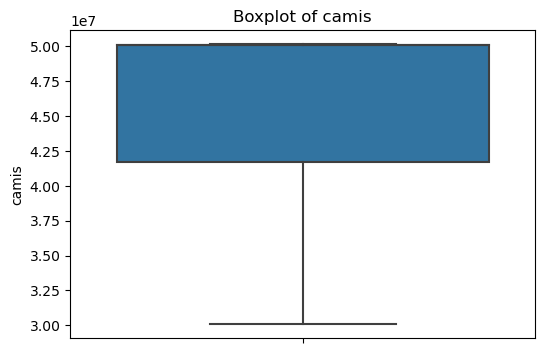

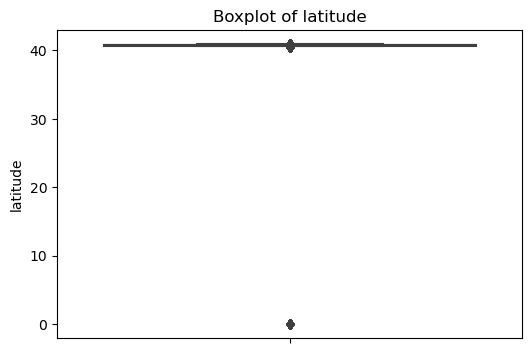

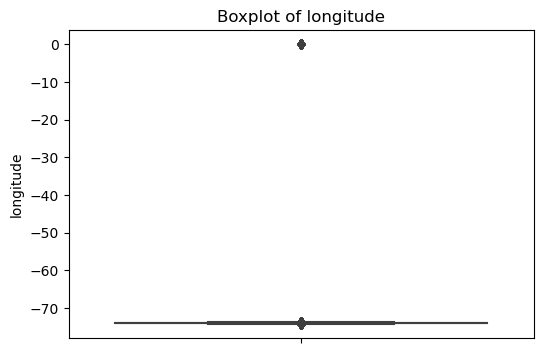

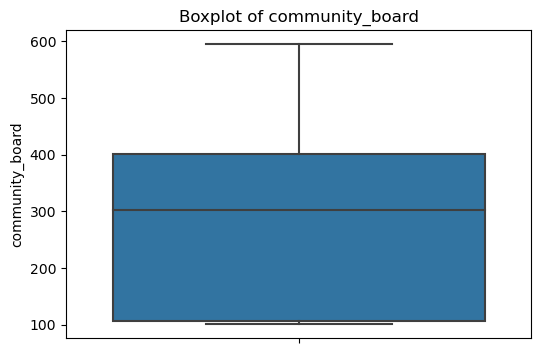

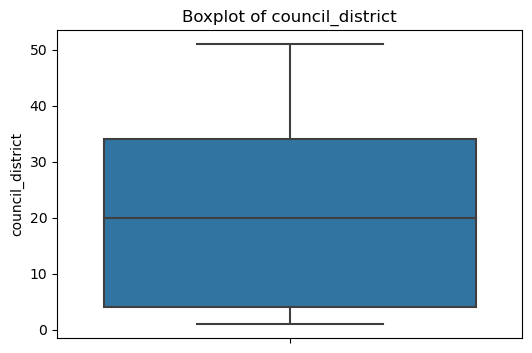

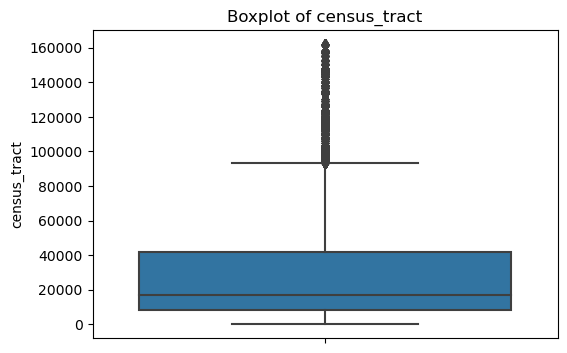

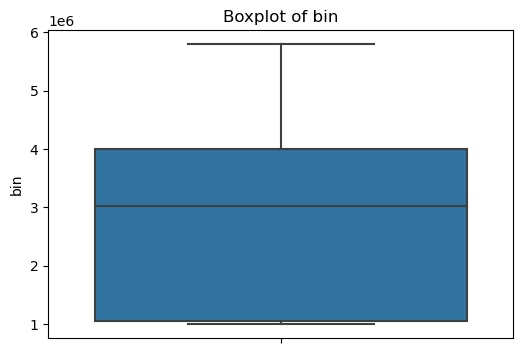

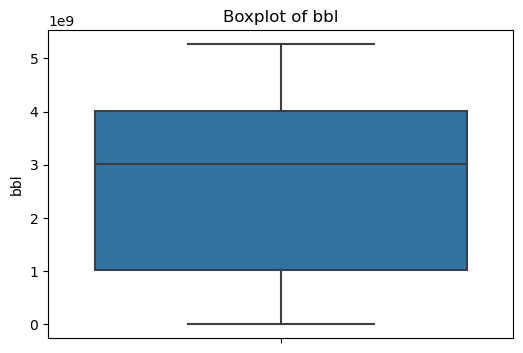

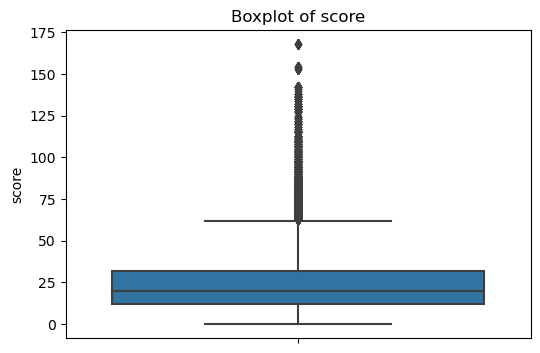

In [24]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()
